In [ ]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import mne
import utils
import matplotlib.pyplot as plt

Data pre-processing

In [2]:
#create dataframe from CSV files
file_path= 'data/eeg_data_A/A*.csv'
eeg_dataframe_A = utils.csv_to_df(file_path)
eeg_dataframe_A.head()
eeg_dataframe_A = utils.format_df(eeg_dataframe_A)
eeg_dataframe_A.head()

Formatting dataframe...


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000,22.314453,21.289062,20.703125,17.968750,12.597656,11.962891,10.156250,11.083984,10.644531,...,-2.490234,-1.220703,-2.392578,1.416016,-2.392578,-1.416016,3.417969,9.765625,20.996094,18.554688
1,0.004,2.294922,2.490234,0.732422,-2.246094,-7.519531,-9.130859,-6.835937,-1.074219,-7.812500,...,-17.968750,-20.117188,-21.386719,-19.287109,-22.802734,-22.558594,-21.777344,-8.789062,-0.976562,-6.835937
2,0.008,6.982422,11.035156,6.933594,5.810547,-0.585938,-1.660156,4.980469,9.863281,2.294922,...,-8.056641,-8.642578,-9.472656,-7.128906,-10.839844,-12.402344,-11.718750,3.906250,5.371094,-2.441406
3,0.012,-2.783203,0.439453,-2.978516,-8.105469,-8.642578,-12.988281,2.880859,-0.146484,-3.515625,...,-14.501953,-14.453125,-13.720703,-12.402344,-15.771484,-17.480469,-19.726562,0.488281,2.441406,-11.718750
4,0.016,-11.816406,-7.177734,-13.720703,-16.259766,-19.042969,-17.822266,-4.736328,-6.005859,-15.234375,...,-19.531250,-19.433594,-18.115234,-17.187500,-20.947266,-23.730469,-26.562500,-0.976562,0.976562,-12.695312


In [3]:
# Band-pass filtering
# High pass filter
eeg_data_unfiltered = eeg_dataframe_A.values

cutoff = 0.5 # typical for high pass filter
sampling_rate = 250 # Hz

#high-pass filter
eeg_data_filtered = utils.band_pass_filter(eeg_dataframe_A.values, 
                                           sampling_rate, 
                                           cutoff,
                                           'high')
#low-pass filter
cutoff = 40 #Hz
eeg_data_filtered = utils.band_pass_filter(eeg_data_filtered, 
                                           sampling_rate, 
                                           cutoff, 
                                           'low')

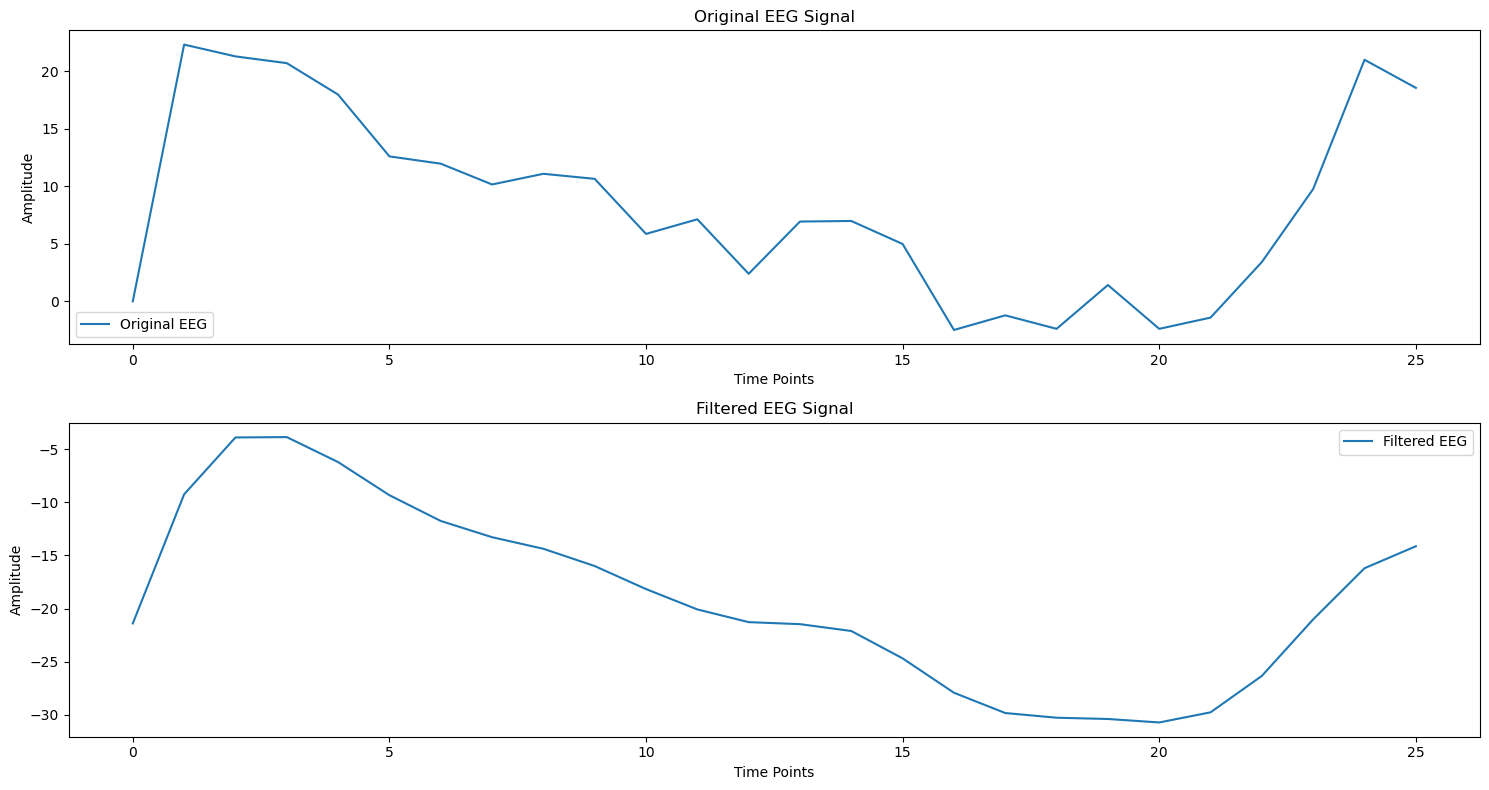

In [5]:
# i ain't waiting for that again lmao
np.save('data/filtered_eeg_array.npy', eeg_data_filtered)


channel = 0

plt.figure(figsize=(15, 8))

# Plotting the original signal
plt.subplot(2, 1, 1)
plt.plot(eeg_data_unfiltered[channel], label='Original EEG')
plt.title('Original EEG Signal')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()

# Plotting the filtered signal
plt.subplot(2, 1, 2)
plt.plot(eeg_data_filtered[channel], label='Filtered EEG')
plt.title('Filtered EEG Signal')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()